#第十七週上課內容

###GitHub 教材參考資料

[位元運算、C Structures](https://github.com/htchen/i2p-nthu/tree/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Supplementary%20Material%202)


[Static, Extern, 搜尋](https://github.com/htchen/i2p-nthu/tree/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Supplementary%20Material%203)

[Other Data Structures](https://github.com/htchen/i2p-nthu/tree/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Supplementary%20Material%204)


# Example 1
## C Structures
[The GNU C Programming Tutorial 對於 structures 的解釋](https://www.gnu.org/software/gnu-c-manual/gnu-c-manual.html#Structures)  

Structures 是可以由使用者自己定義，由其他型別 (甚至是 structure) 的變數所組成的一個資料型別  
這樣的方式在使用上較方便，也會讓程式更簡潔易懂  

譬如要描述平面上的點座標，可以用  

```C
int x, y;
```

若使用 structures 則可以自定一個叫做`t_point`的資料型態  

```C
struct t_point {
   int x;
   int y;
};
```  

關鍵字`struct`後面接著的`t_point`是自己替這個型別取的名字  
括號中間就是這個 structure 所包含的資料結構，括號後面要記得加上分號做結束  
這邊的`x`和`y`稱做`struct t_point`的成員變數 (member)  

定義過 structure 之後，可以用它來宣告變數  

```C
struct t_point pt;
```

如果不想每次寫的時候都要有`struct`關鍵字，，可以利用下面這種寫法  

```C
struct t_point {
    int x;
    int y;
};
typedef struct t_point Point;

Point pt;
```

或是這種寫法  

```C
typedef struct {
    int x;
    int y;
} Point;

Point pt;
```

`pt`會包含`x`和`y`兩個 members，要更改 members 的內容，最直接的方式是使用 member operator `.` 來存取  
如果是指標變數，則可以透過`->`來存取  

```C
Point pt = {5, 7};
pt.x = 7;

Point *pp = &pt;
(*pp).x = 10;
pp->x = 10;
// 上面兩行是等價的
```

又，已經宣告過的 structure 可以再拿來當成另一個 structure 的 member  
然後用它來產生變數，以及存取 members  

```C
typedef struct {
   Point pt1;
   Point pt2;
} Rect;

Rect screen;
printf("%d %d\n", screen.pt1.x, screen.pt1.y);
```


底下是一個較完整的範例  

In [1]:
%%writefile E17_01.c
#include <stdio.h>
#include <stdlib.h>

// 定義一個新的型別
// 取名叫做 Point
// 裡面包含 x 和 y 兩個 members
// 定義過之後 Point 可以被拿來當作一般的型別來使用
// 包括宣告新的變數或是宣告 function
typedef struct {
    int x;
    int y;
} Point;

// ones_vec_1 會傳回某個 Point 結構的位址
// 這個位址是由 Point 結構組成的陣列的開頭位址
Point * ones_vec_1(int length);

// 傳入一個指向 Point* 的指標，ones_vec_2 會把 Point* 的值設定成
// 由 Point 結構組成的陣列的開頭位址
void ones_vec_2(int length, Point **bp);

int main(void)
{
   Point *a, *b;
   int i, length;
   
   printf("The size of a Point is %lu bytes.\n", sizeof(Point));
    
   printf("vector length: ");
   scanf("%d", &length);

   // 利用 ones_vec_1 取得一個陣列
   // 陣列的每個元素是一個 Point
   // 陣列的開頭位址記錄在指標變數 a 裡面
   a = ones_vec_1(length);
   
   // 指標變數 b 同理
   ones_vec_2(length, &b);

   // a 是個指標變數，它記錄的是某個陣列的開頭位址
   // 陣列的每個元素是 a[i] (型別為 Point)
   // 所以有兩個 members 分別是 a[i].x 和 a[i].y
   for (i=0; i<length; i++) 
      printf("(%d, %d) ", a[i].x, a[i].y);
   printf("\n");
   
   // 同理
   for (i=0; i<length; i++)
      printf("(%d, %d) ", (b+i)->x, (b+i)->y); // (b+i)->x == (*(b+i)).x == b[i].x
   printf("\n");
   
   
   return 0;
}

Point * ones_vec_1(int length)
{
   Point *a;
   int i;
   a = (Point *) malloc(length * sizeof(Point));
   for (i = 0 ; i < length; i++) {
      a[i].x = 1;
      a[i].y = 1;
   } 
   return a;
}

void ones_vec_2(int length, Point **bp)  // bp = &b;  *bp == b
{
   int i;
   Point *a;
   
   a = (Point *) malloc(length * sizeof(Point));
   for (i = 0; i < length; i++) {
      a[i].x = 1;
      async[i].y = 1;      
   } 
   *bp = a;
}


Writing E17_01.c


In [2]:
%%shell
gcc E17_01.c -o E17_01
./E17_01

The size of a Point is 8 bytes.
vector length: 10
(1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) 
(1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) 


# Example 2 

## Structures + Functions

Structures 可以使用的 operator 只有 `=` `&` `.` `->`，其他的運算則必須自己寫 functions 來達到我們想要的功能  
例如，想要比較兩個 structure 變數相不相等，不能直接用`==`或`!=`，相加`+`和相減`–`也不能用  

以下是幾個自訂 functions 的例子  



In [30]:
%%writefile E17_02.c
#include <stdio.h>
#include <stdlib.h>
typedef struct t_complex {
    double r;
    double i;
} Complex;

void add(Complex *a, Complex *b, Complex *t)
{
    t->r = a->r+b->r;
    t->i = a->i+b->i;
}
void set_complex(Complex *p, double r, double i)
{
    p->r = r;
    p->i = i;
}
void show_complex(Complex t)
{
    printf("%.2f%+.2fi\n", t.r, t.i);
}

int main(void)
{
    Complex x, y, z;
    set_complex(&x, 1, 2);
    set_complex(&y, 2, -3);
    add(&x, &y, &z);
    show_complex(z);

    return 0;
}


Overwriting E17_02.c


In [31]:
%%shell
gcc E17_02.c -o E17_02
./E17_02

3.00-1.00i


# Example 3 

傳遞 structure 變數到 function，會用 call-by-value 的方式  
所以在 function 裡改變 structure 的 members 的值，並不會影響外部的 structure 變數的內容  

以`show_complex`為例，會發現這個函式其實只是需要讀取外面變數的值，不需要更改其內容  
所以就可以利用 call-by-value 的方式傳入  

但以`set_complex`為例，這樣將會是徒勞無功  
必須如前文的程式碼，使用指標變數才有辦法更改到外面變數的內容  

```C
void set_complex(Complex p, double r, double i)
{
    p.r = r;
    p.i = i;
    // 這個 p 是複製而來的，並不會改變到外面變數的內容
}
```

> Note:  
> 如果是透過 call-by-value，傳遞過程可能需要複製整個變數的內容  
> 相較之下效率可能會比較低  

底下的程式碼，可以將`DATA`想像成是一個`int`的陣列，並包括長度資訊  
其中的`clone_data`是為了實作類似`a = b`的效果，而自己定義出來的 function  


In [4]:
%%writefile E17_03.c

#include <stdio.h>
#include <stdlib.h>
typedef struct t_data {
    int size;
    int * ptr;
} DATA;
void create_data(DATA *z, int sz)
{
    int * t;
    int i;
    z->size = sz;
    z->ptr = (int *) malloc(sz*sizeof(int));
    t = z->ptr;
    for (i=0; i< sz; i++)  {
        t[i] = i;
    }
}
void show_data(DATA d) // d.size = x.size; d.ptr = x.ptr;
{
    int i;
    int *p;
    printf("%lu\n", sizeof(d));
    p = d.ptr;
    for (i=0; i<d.size; i++) {
        printf("%d ", p[i]);
        if ((i+1)%10 == 0) printf("\n");
    }
}
void delete_data(DATA *z) 
{
    free(z->ptr);
    z->ptr = NULL;
    z->size = 0;
}
DATA clone_data(DATA x)
{
    int i;
    DATA y;
    y.size = x.size;
    y.ptr = (int *) malloc(y.size*sizeof(int));
    for (i=0; i<y.size; i++) {
        (y.ptr)[i] = (x.ptr)[i];
    }
    return y;
}

int main(void)
{
    DATA x , x_clone;
    create_data(&x, 100); // x.size = 100; x.ptr = 0x12345678;
    show_data(x);
    //x_clone = x; //x_clone.size = x.size; x_clone.ptr = x.ptr;
    x_clone = clone_data(x);
    delete_data(&x);
    show_data(x_clone);

    return 0;
}


Writing E17_03.c


In [ ]:
%%shell
gcc E17_03.c -o E17_03
./E17_03

16
0 1 2 3 4 5 6 7 8 9 
10 11 12 13 14 15 16 17 18 19 
20 21 22 23 24 25 26 27 28 29 
30 31 32 33 34 35 36 37 38 39 
40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 
60 61 62 63 64 65 66 67 68 69 
70 71 72 73 74 75 76 77 78 79 
80 81 82 83 84 85 86 87 88 89 
90 91 92 93 94 95 96 97 98 99 
16
0 1 2 3 4 5 6 7 8 9 
10 11 12 13 14 15 16 17 18 19 
20 21 22 23 24 25 26 27 28 29 
30 31 32 33 34 35 36 37 38 39 
40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 
60 61 62 63 64 65 66 67 68 69 
70 71 72 73 74 75 76 77 78 79 
80 81 82 83 84 85 86 87 88 89 
90 91 92 93 94 95 96 97 98 99 


# Example 4
## 位元運算
[C reference 對於算數運算子的說明](http://en.cppreference.com/w/c/language/operator_arithmetic)  

C 語言提供了一些 bitwise operators，讓我們能用更低階的方式去存取和修改資料  
*   `~` (bitwise NOT)  
    將每個 bit 的值反轉  
    ```C
    unsigned int a = ~0;
    // 將 a 用二進位表示出來，會得到所有 bit 都是 1
    ```  
*   `&` (bitwise AND)  
    將兩個 operand 對應的 bit 進行 AND 運算  
    ```C
    // 假設 char 是 8 bit
    unsigned char a = 190; // 1011 1110
    unsigned char b = 162; // 1010 0010
    unsigned char c = a&b; // 1010 0010 = 162
    ```  
*   `|` (bitwise OR)  
    將兩個 operand 對應的 bit 進行 OR 運算  
    ```C
    // 假設 char 是 8 bit
    unsigned char a = 190; // 1011 1110
    unsigned char b = 162; // 1010 0010
    unsigned char c = a|b; // 1011 1110 = 190
    ```  
*   `^` (bitwise XOR)  
    將兩個 operand 對應的 bit 進行 XOR 運算  
    ```C
    // 假設 char 是 8 bit
    unsigned char a = 190; // 1011 1110
    unsigned char b = 162; // 1010 0010
    unsigned char c = a^b; // 0001 1100 = 28
    ```  
*   `<<` (left shift)  
    ```C
    // 假設 char 是 8 bit
    unsigned char x = 5; // 0000 0101 = 5
    unsigned char y = x << 3; // 0010 1000 = 40 = 5 * (2^3)
    ```  
*   `>>` (right shift)  
    ```C
    // 假設 char 是 8 bit
    unsigned char x = 59; // 0011 1011 = 59
    unsigned char y = x >> 1; // 0001 1101 = 29 = 59 / (2^1)
    ```  

> Note:  
> 對於 shift operators 其實要注意 operands 的正負號  
> 可以參考開頭的網址了解更多細節，以及整數提升的規則  

有時候我們需要儲存的資訊可能只有 0 和 1 兩種值，譬如記錄某種狀態的有或無  
當我們需要記錄大量這一類的資料時，若每個狀態都使用`int`來記錄會太浪費空間  
這種情況就適合使用位元運算，可以大幅地節省空間  

譬如一個集合中包含 100、200、300 三種數字  
可以把不同數字的有無當成是一個狀態，藉此總共有 2^3 = 8 種子集合  
底下的程式碼可以產生除了空集合以外所有可能的組合  

輸入  

```
3
100 200 300
```

輸出  

```
100
200
100 200
300
100 300
200 300
100 200 300
```

程式碼  


In [32]:
%%writefile E17_04.c
#include <stdio.h>

int mask[16] = {
    0x00001, 0x00002, 0x00004, 0x00008,
    0x00010, 0x00020, 0x00040, 0x00080,
    0x00100, 0x00200, 0x00400, 0x00800,
    0x01000, 0x02000, 0x04000, 0x08000
};

int main(void)
{
    int N, i, j, lim;
    int num[16];

    scanf("%d", &N);
    for (i=0; i<N; i++) {
        scanf("%d", &num[i]);
    }
    lim = 1<<N;
    for (i=0; i<lim; i++) {
        for (j=0; j<N; j++)  {
            if ((i&mask[j])!=0) {
                printf("%d ", num[j]);
            }
        }
        printf("\n");
    }

    return 0;
}


Overwriting E17_04.c


In [33]:
%%shell
gcc E17_04.c -o E17_04
./E17_04
% 1 3 5 7

% 0 0 0 0    0
% 0 0 0 1    1
% 0 0 1 0    2
% 0 0 1 1    3
% 0 1 0 0    4
% 0 1 0 1    5
% 0 1 1 0    6
% 0 1 1 1    7
% 1 0 0 0    8
% 1 0 0 1    9
% 1 0 1 0   10
% 1 0 1 1   11
% 1 1 0 0   12
% 1 1 0 1   13
% 1 1 1 0   14
% 1 1 1 1   15
%

4
1 3 5 7

1 
3 
1 3 
5 
1 5 
3 5 
1 3 5 
7 
1 7 
3 7 
1 3 7 
5 7 
1 5 7 
3 5 7 
1 3 5 7 


In [7]:
%%writefile E17_04.c
//可以進一步將`mask`使用`1 << N`的方式動態產生  

#include <stdio.h>
int main(void)
{
    int N, i, j, lim;
    int num[16];

    scanf("%d", &N);
    for (i=0; i<N; i++) {
        scanf("%d", &num[i]);
    }

    lim = 1<<N;

    for (i=0; i<lim; i++) {
        for (j=0; j<N; j++)  {
            if ( (i & (1<<j))!= 0 ) {
                printf("%d ", num[j]);
            }
        }
        printf("\n");
    }
    return 0;
}


Overwriting E17_04.c


In [8]:
%%shell
gcc E17_04.c -o E17_04
./E17_04

3
10 20 30

10 
20 
10 20 
30 
10 30 
20 30 
10 20 30 


# Example 5

以下是實務中可能會用到的例子，藉由一個夠大的型別來儲存多種屬性  


In [10]:
%%writefile 17_05.c

#include <stddef.h>
#include <stdio.h>
#include <stdlib.h>

#define BIT(n) (1u<<(n))

#define NTHU_STUDENT BIT(0)
#define NHCUE_STUDENT BIT(1)
#define CS_MAJOR BIT(2)
#define FRESHMAN BIT(3)

void Print(unsigned int* students, size_t length)
{
	size_t i;
	for (i = 0; i < length; i++)
	{
		printf("Student %zu: ", i);

		if (students[i] & NTHU_STUDENT)
			printf("NTHU ");

		if (students[i] & NHCUE_STUDENT)
			printf("NHCUE ");

		if (students[i] & CS_MAJOR)
			printf("CS ");

		if (students[i] & FRESHMAN)
			printf("Freshman ");

		printf("\n");
	}
}

int main()
{
	unsigned int a = NTHU_STUDENT | CS_MAJOR | FRESHMAN;
	unsigned int b = NTHU_STUDENT | FRESHMAN;
	unsigned int c = NHCUE_STUDENT | FRESHMAN;;
	unsigned int d = CS_MAJOR;

	unsigned int students[] = { a,b,c,d };
	size_t length = sizeof(students) / sizeof(students[0]);
	size_t i;
	
	Print(students, length);

	printf("\nAfter one year\n\n");

	for (i = 0; i < length; i++) {
		students[i] &= ~FRESHMAN;
	}

	Print(students, length);

	printf("\nAfter merging\n\n");
	
	for (i = 0; i < length; i++) {
		if (students[i] & NHCUE_STUDENT) {
			students[i] &= ~NHCUE_STUDENT;
			students[i] |= NTHU_STUDENT;
		}
	}

	Print(students, length);

	return 0;
}

Writing 17_05.c


In [11]:
%%shell
gcc 17_05.c -o 17_05
./17_05

Student 0: NTHU CS Freshman 
Student 1: NTHU Freshman 
Student 2: NHCUE Freshman 
Student 3: CS 

After one year

Student 0: NTHU CS 
Student 1: NTHU 
Student 2: NHCUE 
Student 3: CS 

After merging

Student 0: NTHU CS 
Student 1: NTHU 
Student 2: NTHU 
Student 3: CS 


# Example 6

## 更多的位元運算

下例的程式碼會回傳從右邊數來第 p 個 bit 開始，取出 n 個 bit  
```C
unsigned getBits(unsigned x, int p, int n)
{
   return ( x >> (p-n) ) & ~( ~0 << n );  /* 取出 x 的第 p 位置起 n 個 bits */
}
```

以`getBits(100, 6, 4)`為例，會從右邊數來第 6 個 bit 開始，取出 4 個 bit  
十進位 100 用二進位表示為 `0001100100`，粗體是要取出的 bits  
0000 0000 0000 0000 0000 0000 01**10** **01**00  

```C
// 這個結果會用來當作mask
~( ~0 << n )
```
*   `~0` : 1111 1111 1111 1111 1111 1111 1111 1111  
*   `<< n` : 1111 1111 1111 1111 1111 1111 1111 0000  
*   `~`: 0000 0000 0000 0000 0000 0000 0000 1111  

```C
// 先把右邊不要的部分透過位移運算移除
x >> (p-n)
```
*   `>> (p-n)` : 0000 0000 0000 0000 0000 0000 0001 **1001**  

```C
// 最後將兩個結果進行 bitwise AND 運算
( x >> (p-n) ) & ~( ~0 << n )
```
*   0000 0000 0000 0000 0000 0000 0000 1111 &  
    0000 0000 0000 0000 0000 0000 0001 **1001** =  
    0000 0000 0000 0000 0000 0000 0000 **1001**  

下例的程式碼是用來把 x 第 p 位置起 n 個 bits 由 0 變 1，1 則變為 0  
```C
unsigned invert( unsigned x, int p, int n )
{
   return  x ^ (~(~0 << n) << (p-n));
}
```

利用 XOR 的運算性質：
*   a ^ 0 = a  
*   a ^ 1 = ~a  

想辦法產生一個 mask，能從 p 位置後接 n 個 1，其餘位置都是零  
這樣的 mask 可以用`~(~0 << n) << (p-n)`產生  
接著將 mask 和 x 做 bitwise XOR 就可得到`invert`要求的效果  

下例的程式碼是用來傳回 x 向右 rotate n bits 之後的結果  

```C
unsigned rightRotate(unsigned x, int n)
{
   return ((x & ~(~0 << n)) << (sizeof(x)*8 - n)) | (x >> n) ;
}
```

首先用`(x & ~(~0 << n))`取出最右邊 n 個 bits，然後向左位移`(sizeof(x)*8 - n)`bits  
接著`(x >> n)`把 x 向右位移 n  bits，把兩個結果利用 OR 運算就可以做出向右 rotate 的效果  

> Note:  
> 以上範例均是假設`int`為 32 位元

## 在二進位表示法下，找出下一個「位元中具有相同數量的 1 」的數字
例如，`00100110` 包含三個 `1`，
下一個符合這個條件、也包含三個 `1` 的數字是 `00101001`

00100110
00100111
00101000
00101001



用下面這段程式碼可以直接算出
```C
char x, t, y, z;
x = 38; // 00100110
t = x & -x; // 00100110 & 11011010 -> 00000010 找出最右邊的 1
y = t + x;  // 00000010 + 00100110 -> 00101000 設法讓x 最右邊的連續的 1 都變成 0，當作是下一個要考慮的數的起點，y 包含的 1 的數量一定會比 x 還少。接下來只要知道要替 y 補上幾個 1，就可以得到我們要的結果
z = y ^ x;  // 00101000 ^ 00100110 -> 00001110 找出上一步哪些地方被改了
z = (z/t)>>2; // (00001110 / 00000010) >> 2 -> 00000001 去掉最右邊的 0 然後忽略最左邊和最右邊（總共兩個）1，如此可以得到需要補的 1 有幾個
x = y | z; //00101000 | 00000001 -> 00101001 把上缺的 1
```

In [34]:
%%writefile E17_06.c
#include <stdio.h>
int main(void)
{
  int x, t, y, z;
  int N, k, i, j, lim;
  int num[16];
  scanf("%d%d", &N, &k);
  for (i=0; i<N; ++i) {
      scanf("%d", &num[i]);
  }
  lim = 1 << N;
  x = 0;
  x = ~(~x << k);

  for ( ; x<lim; ) {
    for (j=N-1; j>=0; --j) {
      if ((x &(1<<j)) != 0) {
          printf("%d ", num[j]);
      }
    }
    t = x & -x; 
    y = t + x;
    z = y ^ x; 
    z = (z/t)>>2;
    x = y | z;

    printf("\n");
  }
    return 0;
}

Overwriting E17_06.c


In [37]:
%%shell
gcc E17_06.c -o E17_06
./E17_06

8 3
1 2 3 4 5 6 7 8
3 2 1 
4 2 1 
4 3 1 
4 3 2 
5 2 1 
5 3 1 
5 3 2 
5 4 1 
5 4 2 
5 4 3 
6 2 1 
6 3 1 
6 3 2 
6 4 1 
6 4 2 
6 4 3 
6 5 1 
6 5 2 
6 5 3 
6 5 4 
7 2 1 
7 3 1 
7 3 2 
7 4 1 
7 4 2 
7 4 3 
7 5 1 
7 5 2 
7 5 3 
7 5 4 
7 6 1 
7 6 2 
7 6 3 
7 6 4 
7 6 5 
8 2 1 
8 3 1 
8 3 2 
8 4 1 
8 4 2 
8 4 3 
8 5 1 
8 5 2 
8 5 3 
8 5 4 
8 6 1 
8 6 2 
8 6 3 
8 6 4 
8 6 5 
8 7 1 
8 7 2 
8 7 3 
8 7 4 
8 7 5 
8 7 6 


# Example 7


## Linked List

linked list 是一種常見的資料結構  

array 在存取元素時只需要利用起始位址及位移量，就可以算出要存取的元素在哪裡  
但如果想要在 array 中間插入元素或是刪除元素，勢必要挪動一部分的元素以遞補或是騰出空位  
當插入的動作相當頻繁時，array 就會花很多時間在資料的複製與搬移  

而 linked list 的想法就是，元素不需要是連續地儲存在記憶體  
每個元素自己都有個資訊可以記得下一個元素在哪裡，與自己本身要儲存的資料  


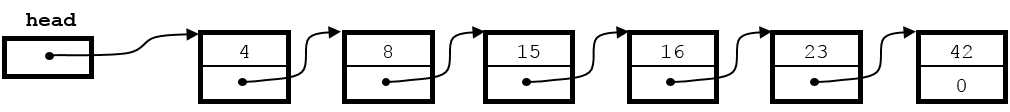



透過這樣的設計，要插入元素的時候，只需改變幾個元素的「下一個元素的位址」的資訊  
這樣就只需要簡單的幾個操作就可以插入元素，並不會因為資料規模變大而使得插入的速度變慢  
但與此同時，如果想要從第一個元素走到最後一個，或是想要存取其中某個元素  
勢必得從頭開始走訪，沒辦法如同 array 那般快速  

```C
#include <stdio.h>
#include <stdlib.h>
typedef struct _node {
    int x;
    struct _node *next;
} Node;

int main(void)
{
    Node head;

    head.x = 0;
    head.next = NULL;

    head.next = (Node *) malloc (sizeof(Node));

    (head.next)->x = 1;
    (head.next)->next = NULL;

    printf("%d %d\n", head.x, (head.next)->x);

    free(head.next);

    return 0;
}
```

底下的程式碼利用迴圈來產生 node  








In [28]:
%%writefile E17_07.c
#include <stdio.h>
#include <stdlib.h>
typedef struct _node {
    int x;
    struct _node *next;
} Node;

/*
head[x|next]
        |
        V
        [x|next]
             |
             V
        np-> [x|next]
*/

int main(void)
{
    Node head;
    Node *np, *nq;
    int i;

    head.x = 0;
    head.next = (Node *) malloc(sizeof(Node));
    np = head.next;
    i = 1;
    while (i < 10) {
        np->x = i;
        np->next = (Node *) malloc(sizeof(Node));
        np = np->next;
        i++;
    }
    np->x = i;
    np->next = NULL;
    np = head.next;
    while (np!=NULL) {
        printf("%d\n", np->x);
        np = np->next;
    }

    np = head.next;
    while (np!=NULL) {
        nq = np;
        np = np->next;
        free(nq);
    }

    return 0;
}


Writing E17_07.c


In [29]:
%%shell
gcc E17_07.c -o E17_07
./E17_07

1
2
3
4
5
6
7
8
9
10



透過上面的範例大致理解 linked list 以後  
接下來我們希望設計一個 linked list，存的資料順序要由小排到大，為此我們需要解決幾個問題：  
1.  如何產生一個 linked list
2.  如何在某個位置插入一個 node
3.  如何拿掉某個 node

故可以設計這些 functions  

```C
struct t_node* insert(struct t_node *np, int val);
struct t_node* delete(struct t_node *np, char val);
void dispList(struct t_node *np);
```

主程式從產生`head`開始  

```C
struct t_node *head;
head = NULL;
```

呼叫`insert`把某個值加入`head`所指到的 linked list 的適當位置 (node 的 data 值要從小排到大)  

```C
head = insert(head, 4); /* 經過 insert() 之後， head 可能需要指到不同位址 */
head = insert(head, 8); /* 所以要傳回新的位址給 head */
head = insert(head, 13);
```

或是呼叫`delete`把值從`head`所指到的 linked list 中刪除  

```C
head = delete(head, 13);
head = delete(head, 4);
head = delete(head, 11);
```

或是呼叫`dispList`把`head`所指到的 linked list 的內容顯示出來  

```C
dispList(head);
```

先來看怎麼寫`dispList`  

```C
void dispList(struct t_node *np)
{ 
   if ( np == NULL ) {
      printf("List is empty.\n\n");
   }  
   else { 
      printf("The list is:\n");
      while (np != NULL) { 
         printf("%d--> ", np->data);
         np = np->nextPtr;   
      }
      printf("NULL\n\n");
   }
}
```


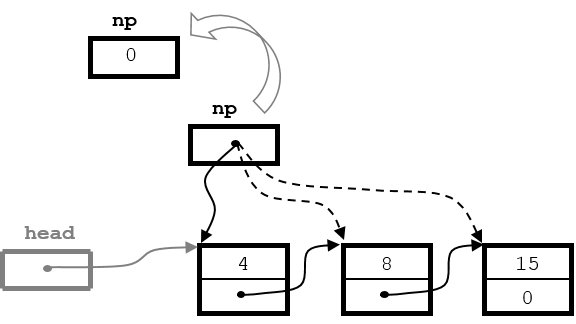




再來看`insert`怎麼寫  

```C
struct t_node* insert(struct t_node *np, int val)
{ 
   struct t_node *newPtr, *previousPtr, *currentPtr; 

   newPtr = (struct t_node *)malloc(sizeof(struct t_node)); 
   if (newPtr != NULL) { 
      newPtr->data = val; 
      newPtr->nextPtr = NULL; 
      previousPtr = NULL;
      currentPtr = np;
      while (currentPtr!=NULL && val>currentPtr->data) { 
         previousPtr = currentPtr;    
         currentPtr = currentPtr->nextPtr; 
      }      
      if (previousPtr == NULL) { 
         newPtr->nextPtr = np;
         np = newPtr;
      }
      else {
         previousPtr->nextPtr = newPtr;
         newPtr->nextPtr = currentPtr;
      }   
      return np;
   }
   else {
      printf("Out of memory\n");
      return NULL;
   }
}
```


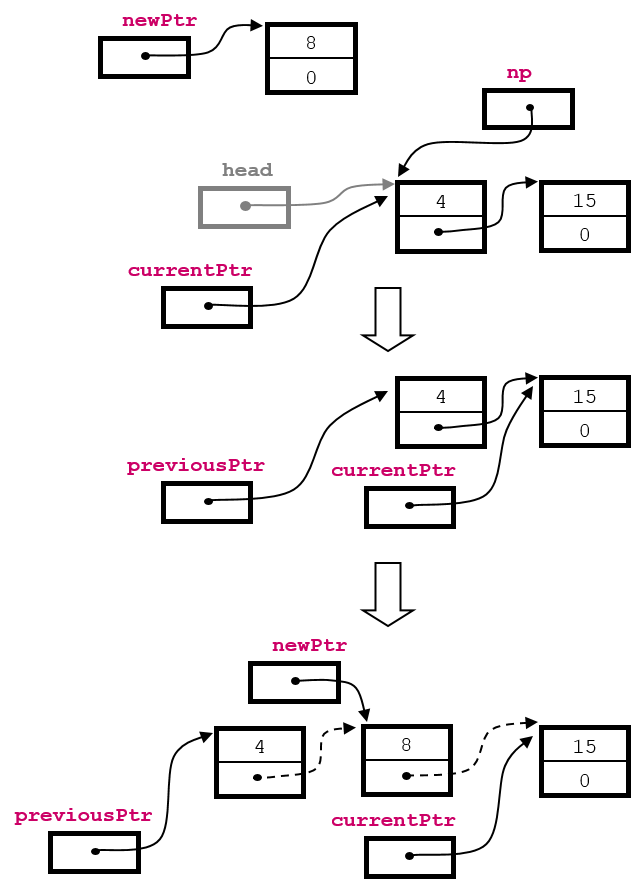


最後看怎麼寫`delete`  

```C
struct t_node* delete(struct t_node *np, int val)
{ 
   struct t_node *previousPtr, *currentPtr, *tempPtr;    

   if (val == np->data) { 
      tempPtr = np; 
      np = np->nextPtr; 
      free( tempPtr ); 
      return np;
   }
   else { 
      previousPtr = np;
      currentPtr = np->nextPtr;
      while (currentPtr != NULL && 
                currentPtr->data != val) { 
         previousPtr = currentPtr;         
         currentPtr = currentPtr->nextPtr; 
      }
      if (currentPtr != NULL) { 
         tempPtr = currentPtr;
         previousPtr->nextPtr = currentPtr->nextPtr;
         free( tempPtr );
         return np;
      }     
   } 
   return NULL;
}
```

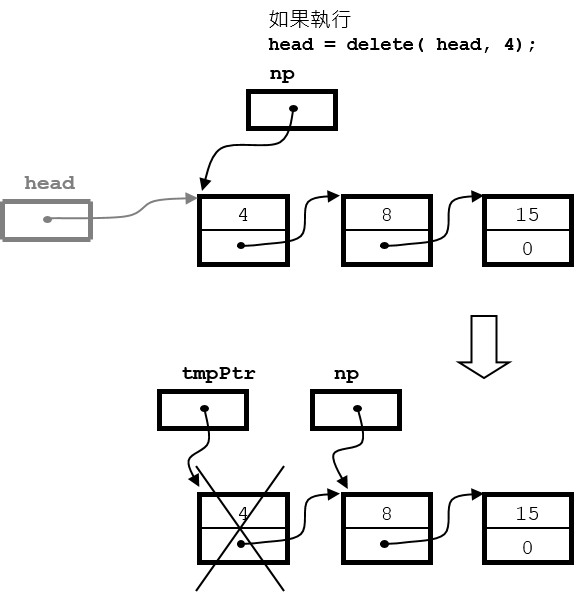

# Supplementary Material 3

目錄  
*	[關於 static 與 extern](#關於-static-與-extern)  
*	[資料處理](#資料處理)  
*	[查字典與自動完成](#查字典與自動完成)  
*	[Doubly Linked List](#doubly-linked-list)  

## 關於 static 與 extern
[Stack Overflow 關於這部分的說明](https://stackoverflow.com/questions/95890/what-is-a-variables-linkage-and-storage-specifier)  

*   **static**  
    函數或是全域變數前面如果加`static`  
    表示這個函數不會被 linker 看到  
    因此不會和其他檔案連結  

    區域變數前面如果加`static`  
    表示這個變數從程式開始執行就會存在  
    直到程式結束才會消失  

*   **extern**  
    只在一個原始碼檔案中定義  
    
    ```C
    int x = 0;
    ```
    
    其他原始碼檔案如果要使用`x`，應該宣告成  
    
    ```C
    extern int x;
    ```
    
    > Note:  
    > 可以參考底下的資料，進一步了解對於變數來說甚麼時候需要`extern`  
    > [Stack Overflow 關於 Global Variable in Header File 的問答](https://stackoverflow.com/questions/8108634/global-variables-in-header-file)  


## 資料處理
*   [qsort](http://www.gnu.org/software/libc/manual/html_node/Array-Sort-Function.html#Array-Sort-Function)
*   [fgets](http://www.cplusplus.com/reference/cstdio/fgets/)

讀取`imdb_top250.txt`檔案，裡面包含了 250 筆電影資料  
每一筆資料包含四個項目，分別是平均評分、電影名稱、上映年份、參與評分的網友數目  



Download file:
[imdb_top250.txt](https://drive.google.com/file/d/15j-pExj6FtuizDIpNewdqcvvfrkPPLSF/view?usp=sharing)



輸入中的每一筆資料之間用空行隔開  

```
9.2
The Shawshank Redemption
1994
885806

9.2
The Godfather
1972
641587
```

並利用底下的 structure 儲存  

```C
struct t_movie {
    double rating;
    char name[64];
    int year;
    int reviews;
};
typedef struct t_movie Movie;
```

且產生一個 250 個元素的陣列，儲存 250 筆電影資料  

```C
Movie top[250];
```

利用`qsort`將資料以底下的原則重新排列：  
1.  依照電影名稱的英文字母順序
2.  依照上映年份排序，從早期到近期，如果年份相同，則再依照電影名稱的英文字母順序排序
3.  依照平均評分的高低排序，由高到低，如果評分相同，則再依照參與評分的網友數量排序

將以上三點的的排序結果分別輸出為`sort1.txt`、`sort2.txt`、`sort3.txt`

範例程式碼  

```C
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

struct t_movie {
    double rating;
    char name[64];
    int year;
    int reviews;
};
typedef struct t_movie Movie;
Movie movies[300];

int cmp1(const void *a, const void *b)
{
    Movie *s, *t;
    s = (Movie*) a;
    t = (Movie*) b;
    return strcmp(s->name, t->name);
}
int cmp2(const void *a, const void *b)
{
    Movie *s, *t;
    s = (Movie*) a;
    t = (Movie*) b;
    if (s->year > t->year) return 1;
    else if (s->year < t->year) return -1;
    else
         return strcmp(s->name, t->name);
}
int cmp3(const void *a, const void *b)
{
    Movie *s, *t;
    s = (Movie*) a;
    t = (Movie*) b;
    if (s->rating > t->rating) return -1;
    else if (s->rating < t->rating) return 1;
    else {
        if (s->reviews > t->reviews) return -1;
        else if (s->reviews < t->reviews) return 1;
        else return 0;
    }
}

void write(char * fname, Movie *mvs, int NM)
{
    int i;
    FILE *fout;
    fout = fopen(fname, "w");
    for (i=0; i<NM; i++) {
        fprintf(fout, "%3d: %f\t%s\t(%d)\t%d\n",
               i+1, mvs[i].rating, mvs[i].name, mvs[i].year, mvs[i].reviews);
    }
    fclose(fout);
}

int main(void)
{
    int NM;
    FILE *fin;

    char line[255];
    fin = fopen("imdb_top250.txt", "r");

    NM = 0;
    while (!feof(fin) ) {
        if (fgets(line, 255, fin)==NULL) break;
        movies[NM].rating = atof(line);
        if (fgets(line, 255, fin)==NULL) break;
        strcpy(movies[NM].name, line);
        if (fgets(line, 255, fin)==NULL) break;
        movies[NM].year = atoi(line);
        if (fgets(line, 255, fin)==NULL) break;
        movies[NM].reviews = atoi(line);
        NM++;
        if (fgets(line, 255, fin)==NULL) break;
    }
    fclose(fin);
/*
    for (i=0; i<NM; i++) {
        printf("%3d: %f\t%s\t(%d)\t%d\n",
               i+1, movies[i].rating, movies[i].name, movies[i].year, movies[i].reviews);
    }
*/
    qsort(movies, NM, sizeof(Movie), cmp1);
    write("sort1.txt", movies, NM);

    qsort(movies, NM, sizeof(Movie), cmp2);
    write("sort2.txt", movies, NM);

    qsort(movies, NM, sizeof(Movie), cmp3);
    write("sort3.txt", movies, NM);


    return 0;
}
```

另一種透過指標陣列的寫法  

```C
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

struct t_movie {
    double rating;
    char name[64];
    int year;
    int reviews;
};
typedef struct t_movie Movie;
Movie movies[300];

int cmp1(const void *a, const void *b)
{
    Movie *s, *t;
    s = * (Movie**) a;
    t = * (Movie**) b;
    return strcmp(s->name, t->name);
}
int cmp2(const void *a, const void *b)
{
    Movie *s, *t;
    s = * (Movie**) a;
    t = * (Movie**) b;
    if (s->year > t->year) return 1;
    else if (s->year < t->year) return -1;
    else
         return strcmp(s->name, t->name);
}
int cmp3(const void *a, const void *b)
{
    Movie *s, *t;
    s = * (Movie**) a;
    t = * (Movie**) b;
    if (s->rating > t->rating) return -1;
    else if (s->rating < t->rating) return 1;
    else {
        if (s->reviews > t->reviews) return -1;
        else if (s->reviews < t->reviews) return 1;
        else return 0;
    }
}

void write(char * fname, Movie * pmvs[], int NM)
{
    int i;
    FILE *fout;
    fout = fopen(fname, "w");
    for (i=0; i<NM; i++) {
        fprintf(fout, "%3d: %f\t%s\t(%d)\t%d\n",
               i+1, pmvs[i]->rating, pmvs[i]->name, pmvs[i]->year, pmvs[i]->reviews);
    }
    fclose(fout);
}

int main(void)
{
    int NM;
    FILE *fin;

    char line[255];
    fin = fopen("imdb_top250.txt", "r");

    Movie *pmovies[300];
    int i;
    for (i=0; i<300; i++) pmovies[i] = &movies[i];

    NM = 0;
    while (!feof(fin) ) {
        if (fgets(line, 255, fin)==NULL) break;
        movies[NM].rating = atof(line);
        if (fgets(line, 255, fin)==NULL) break;
        line[strlen(line)-1] = '\0';
        strcpy(movies[NM].name, line);
        if (fgets(line, 255, fin)==NULL) break;
        movies[NM].year = atoi(line);
        if (fgets(line, 255, fin)==NULL) break;
        movies[NM].reviews = atoi(line);
        NM++;
        if (fgets(line, 255, fin)==NULL) break;
    }
    fclose(fin);


    qsort(pmovies, NM, sizeof(Movie*), cmp1);
    write("sort1.txt", pmovies, NM);

    qsort(pmovies, NM, sizeof(Movie*), cmp2);
    write("sort2.txt", pmovies, NM);

    qsort(pmovies, NM, sizeof(Movie*), cmp3);
    write("sort3.txt", pmovies, NM);


    return 0;
}
```

## 查字典與自動完成

利用附件`words.txt`  

Download file:
[words.txt](https://drive.google.com/file/d/1CbL7vlZLtuPuOq4Ns9kQjucENs6AvwJc/view?usp=sharing)



```C
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
enum {
    MAX_LEN = 60,
    NUM_WORDS = 120000
};

int lookup(char word[], char *dict[], int nwords);

int main(void)
{
    char **p, buf[MAX_LEN + 1];
    int i, j;
    FILE *fin;

    fin = fopen("words.txt", "r");
    p = (char **) malloc(sizeof(char *)* NUM_WORDS);
    i = 0;
    while(i< NUM_WORDS && (fgets(buf, MAX_LEN + 1, fin) != NULL)) {
        buf[strlen(buf)-1] =  '\0';
        p[i] = malloc(strlen(buf)+1);
        if (p[i] != NULL) {
            strcpy(p[i], buf);
            i++;
        }
    }
    fclose(fin);

    while(fgets(buf, MAX_LEN + 1, stdin) != NULL) {
        buf[strlen(buf)-1] = '\0';
        j = lookup(buf, p, i);
        while (j>=0) {
            if (strncmp(p[j], buf, strlen(buf))!=0) {
                j++;
                break;
            }
            j--;
        }
        if (j<0) j = 0;
        while (j<i) {
            if (strncmp(p[j], buf, strlen(buf))!=0)
                break;
            printf("%s\n", p[j]);
            j++;
        }
    }

    for (j=0; j<i; j++) {
        free(p[j]);
    }
    free(p);

    return 0;
}

int lookup(char *word, char *dict[], int nwords)
{
    int  low, high, mid, cmp;
    low = mid = 0;
    high = nwords - 1;
    while (low <= high) {
        mid = low + (high-low)/2;
        cmp = strcmp(word, dict[mid]);
        if (cmp < 0)
            high = mid - 1;
        else if (cmp > 0)
            low = mid + 1;
        else
            break;
    }
    return mid;
}
```

## Doubly Linked List
[維基百科對於 doubly linked list 的說明](http://en.wikipedia.org/wiki/Doubly_linked_list)

底下是框架，可以試著實作那些尚未被完成的功能  

```C
##include <stdio.h>
#include <stdlib.h>

struct dl_node {
    int data;
    struct dl_node *prev;
    struct dl_node *next;
};
typedef struct dl_node DL_Node;

struct dl_list {
    DL_Node *firstNode;
    DL_Node *lastNode;
};
typedef struct dl_list DL_List;

void insertAfter(DL_List *list, DL_Node *node, DL_Node *newNode)
{

}

void insertBefore(DL_List *list, DL_Node *node, DL_Node *newNode)
{

}

void insertBeginning(DL_List *list, DL_Node *newNode)
{

}

void insertEnd(DL_List *list, DL_Node *newNode)
{

}

DL_Node *createNewNode(int data)
{
    DL_Node *p;
    p = (DL_Node*) malloc(sizeof(DL_Node));
    p->data = data;
    p->prev = NULL;
    p->next = NULL;
    return p;
}

void showList(DL_List *list)
{
    DL_Node *p = list->firstNode;
    while (p != NULL) {
        printf("%d->", p->data);
        p = p->next;
    }
    printf("NULL\n");
}
void showListReverse(DL_List *list)
{

}
void removeNode(DL_List *list, DL_Node *node)
{

}
void freeList(DL_List *list)
{
    DL_Node *p = list->firstNode;
    while (p != NULL) {
        p = p->next;
        if (p!=NULL)
            free(p->prev);
        else
            free(list->lastNode);
    }
    free(list);
}
int main(void)
{
    DL_List *dll = NULL;

    dll = (DL_List*) malloc(sizeof(DL_List));

    dll->firstNode = NULL;
    dll->lastNode = NULL;

    insertBeginning(dll, createNewNode(14));
    insertBeginning(dll, createNewNode(13));
    insertBeginning(dll, createNewNode(12));
    insertBeginning(dll, createNewNode(11));
    insertBeginning(dll, createNewNode(10));

    insertEnd(dll, createNewNode(20));
    insertEnd(dll, createNewNode(21));
    insertEnd(dll, createNewNode(22));
    insertEnd(dll, createNewNode(23));
    insertEnd(dll, createNewNode(24));

    showList(dll);
    showListReverse(dll);

    removeNode(dll, dll->firstNode);
    removeNode(dll, dll->lastNode);
    showList(dll);

    freeList(dll);

    return 0;
}
```

執行之後應該要得到  

```
10->11->12->13->14->20->21->22->23->24->NULL
24->23->22->21->20->14->13->12->11->10->NULL
11->12->13->14->20->21->22->23->NULL
```

圖示搭配程式碼可以參考 `dll.pptx`


Download file:
[dll.pptx](https://docs.google.com/presentation/d/1joFu5wZdmHfJFTo0robWODhkLCU2mkxk/edit?usp=sharing&ouid=113447873319056546407&rtpof=true&sd=true)



底下是完整的程式碼  

```C
#include <stdio.h>
#include <stdlib.h>

struct dl_node {
    int data;
    struct dl_node *prev;
    struct dl_node *next;
};
typedef struct dl_node DL_Node;

struct dl_list {
    DL_Node *firstNode;
    DL_Node *lastNode;
};
typedef struct dl_list DL_List;

void insertAfter(DL_List *list, DL_Node *node, DL_Node *newNode)
{
    newNode->prev = node;
    newNode->next = node->next;
    if (node->next == NULL) {
        list->lastNode = newNode;
    } else {
        node->next->prev = newNode;
    }
    node->next = newNode;
}

void insertBefore(DL_List *list, DL_Node *node, DL_Node *newNode)
{
    newNode->prev = node->prev;
    newNode->next = node;
    if (node->prev == NULL) {
        list->firstNode = newNode;
    } else {
        node->prev->next = newNode;
    }
    node->prev = newNode;
}

void insertBeginning(DL_List *list, DL_Node *newNode)
{
    if (list->firstNode == NULL) {
        list->firstNode = newNode;
        list->lastNode = newNode;
        newNode->prev = NULL;
        newNode->next = NULL;
    } else {
        insertBefore(list, list->firstNode, newNode);
    }
}

void insertEnd(DL_List *list, DL_Node *newNode)
{
    if (list->lastNode == NULL) {
        insertBeginning(list, newNode);
    } else {
        insertAfter(list, list->lastNode, newNode);
    }
}

DL_Node *createNewNode(int data)
{
    DL_Node *p;
    p = (DL_Node*) malloc(sizeof(DL_Node));
    p->data = data;
    p->prev = NULL;
    p->next = NULL;
    return p;
}

void showList(DL_List *list)
{
    DL_Node *p = list->firstNode;
    while (p != NULL) {
        printf("%d->", p->data);
        p = p->next;
    }
    printf("NULL\n");
}

void showListReverse(DL_List *list)
{
    DL_Node *p = list->lastNode;
    while (p != NULL) {
        printf("%d->", p->data);
        p = p->prev;
    }
    printf("NULL\n");
}

void removeNode(DL_List *list, DL_Node *node)
{
    if (node->prev == NULL) {
        list->firstNode = node->next;
    } else {
        node->prev->next = node->next;
    }
    if (node->next == NULL) {
        list->lastNode = node->prev;
    } else {
        node->next->prev = node->prev;
    }
    free(node);
}

void freeList(DL_List *list)
{
    DL_Node *p = list->firstNode;
    while (p != NULL) {
        p = p->next;
        if (p!=NULL)
            free(p->prev);
        else
            free(list->lastNode);
    }
    free(list);
}

int main(void)
{
    DL_List *dll = NULL;

    dll = (DL_List*) malloc(sizeof(DL_List));

    dll->firstNode = NULL;
    dll->lastNode = NULL;


    insertBeginning(dll, createNewNode(14));
    insertBeginning(dll, createNewNode(13));
    insertBeginning(dll, createNewNode(12));
    insertBeginning(dll, createNewNode(11));
    insertBeginning(dll, createNewNode(10));

    insertEnd(dll, createNewNode(20));
    insertEnd(dll, createNewNode(21));
    insertEnd(dll, createNewNode(22));
    insertEnd(dll, createNewNode(23));
    insertEnd(dll, createNewNode(24));

    showList(dll);
    showListReverse(dll);

    removeNode(dll, dll->firstNode);
    removeNode(dll, dll->lastNode);
    showList(dll);

    freeList(dll);

    return 0;
}

```


